In [114]:
import numpy as np
import math


def shrink_quadrilateral(v1, v2, v3, v4, margin):
    # xxx
    # Calculate the centroid of the quadrilateral
    centroid = np.mean([v1, v2, v3, v4], axis=0)
    
    # Define a function to move a point towards the centroid by a given margin
    def move_point_towards_centroid(point, centroid, margin):
        # Calculate the direction vector from the point to the centroid
        direction_vector = centroid - point
        # Normalize the direction vector
        norm = np.linalg.norm(direction_vector)
        if norm == 0:
            return point  # In case the point is already at the centroid
        normalized_direction_vector = direction_vector / norm
        # Calculate the new point that is 'margin' distance closer to the centroid
        new_point = point + margin * normalized_direction_vector
        return new_point
    
    # Move each vertex towards the centroid by the margin
    new_v1 = move_point_towards_centroid(v1, centroid, margin)
    new_v2 = move_point_towards_centroid(v2, centroid, margin)
    new_v3 = move_point_towards_centroid(v3, centroid, margin)
    new_v4 = move_point_towards_centroid(v4, centroid, margin)
    
    return new_v1, new_v2, new_v3, new_v4


In [115]:
# import numpy as np
# import math

# def shrink_triangle(v1, v2, v3, margin):
#     # Calculate the centroid of the triangle
#     centroid = np.mean([v1, v2, v3], axis=0)
    
#     # Define a function to move a point towards the centroid by a given margin
#     def move_point_towards_centroid(point, centroid, margin):
#         # Calculate the direction vector from the point to the centroid
#         direction_vector = centroid - point
#         # Normalize the direction vector
#         norm = np.linalg.norm(direction_vector)
#         if norm == 0:
#             return point  # In case the point is already at the centroid
#         normalized_direction_vector = direction_vector / norm
#         # Calculate the new point that is 'margin' distance closer to the centroid
#         new_point = point + margin * normalized_direction_vector
#         return new_point
    
#     # Move each vertex towards the centroid by the margin
#     new_v1 = move_point_towards_centroid(v1, centroid, margin)
#     new_v2 = move_point_towards_centroid(v2, centroid, margin)
#     new_v3 = move_point_towards_centroid(v3, centroid, margin)
    
#     return new_v1, new_v2, new_v3

# Example usage:
vertex1 = np.array([0, 0])
vertex2 = np.array([200, 0])
vertex3 = np.array([100, 100])
vertex4 = np.array([300,150])
margin = 0.1  # Example margin

shrinked_v1, shrinked_v2, shrinked_v3, shrinked_v4= shrink_quadrilateral(vertex1, vertex2, vertex3, vertex4, margin)

In [116]:
import numpy as np
import math

# def getRandomSamples(x0, y0, x1, y1, x2, y2, n_points):
#     # Coordinates of the triangle's vertices
#     point0 = np.array([x0, y0])
#     point1 = np.array([x1, y1])
#     point2 = np.array([x2, y2])
    
#     # Vectors from point 0 to point 1 and from point 0 to point 2
#     e0 = point1 - point0
#     e1 = point2 - point0
    
#     # List to store the random points
#     randomPoints = []
    
#     for _ in range(n_points):
#         # Generate random x, y in the range [0, 1]
#         x, y = np.random.rand(2)
#         # Ensure the random point (x, y) lies within the triangle
#         if x + y > 1:
#             x = 1 - x
#             y = 1 - y

#         # Calculate a random point within the triangle
#         randomPoint = point0 + e0 * x + e1 * y
#         randomPoints.append(randomPoint)
    
#     return randomPoints

import numpy as np

def getRandomSamplesInQuadrilateral(x1, y1, x2, y2, x3, y3, x4, y4, n_points):
    # Coordinates of the quadrilateral's vertices
    point1 = np.array([x1, y1])
    point2 = np.array([x2, y2])
    point3 = np.array([x3, y3])
    point4 = np.array([x4, y4])
    
    # Divide the quadrilateral into two triangles:
    # Triangle 1: point0, point1, point2
    # Triangle 2: point2, point3, point0
    
    # List to store the random points
    randomPoints = []
    
    for _ in range(n_points):
        # Randomly choose one of the two triangles to place a point
        if np.random.rand() < 0.5:
            # Working with triangle 1 (p123)
            base_point = point1
            edge0 = point2 - point1
            edge1 = point3 - point1
        else:
            # Working with triangle 2 (p234)
            base_point = point2
            edge0 = point3 - point2
            edge1 = point4 - point2
            
        # Generate random x, y in the range [0, 1]
        x, y = np.random.rand(2)
        # Ensure the random point (x, y) lies within the triangle
        if x + y > 1:
            x = 1 - x
            y = 1 - y

        # Calculate a random point within the selected triangle
        randomPoint = base_point + edge0 * x + edge1 * y
        randomPoints.append(randomPoint)
    
    return randomPoints

# MARK
n_points = 50000  # Number of random points to generate
# n_points = 50000  # Number of random points to generate

coordinates = getRandomSamplesInQuadrilateral(shrinked_v1[0], shrinked_v1[1], 
                               shrinked_v2[0], shrinked_v2[1], 
                               shrinked_v3[0], shrinked_v3[1], 
                               shrinked_v4[0], shrinked_v4[1],
                               n_points)
coordinates = np.vstack(coordinates)
# print coordinates
coordinates

array([[ 82.25664557,  25.68342276],
       [ 99.84107155,  99.49172827],
       [109.45022579,   5.94673471],
       ...,
       [215.584512  ,  32.97850603],
       [171.79279851, 107.73504771],
       [205.28452676,  84.41199405]])

In [117]:
#随机生成坐标值
# Redefine the ranges and step size
# x_range = (90.05, 105.7)
# y_range = (40.05, 55.7)
# step_size = 0.1

# # Generate the coordinate arrays
# x_values = np.arange(x_range[0], x_range[1] + step_size, step_size)
# y_values = np.arange(y_range[0], y_range[1] + step_size, step_size)

# # Create a mesh grid and then flatten the arrays to get all combinations
# x_mesh, y_mesh = np.meshgrid(x_values, y_values)
# coordinates = np.array([x_mesh.flatten(), y_mesh.flatten()]).T
# coordinates.size

In [118]:
#随机生成坐标值
# Redefine the ranges and step size
# x_range = (90.05, 105.7)
# y_range = (40.05, 55.7)
# step_size = 0.1

# # Generate the coordinate arrays
# x_values = np.arange(x_range[0], x_range[1] + step_size, step_size)
# y_values = np.arange(y_range[0], y_range[1] + step_size, step_size)

# Create a mesh grid and then flatten the arrays to get all combinations
# x_mesh, y_mesh = np.meshgrid(x_values, y_values)
# coordinates = np.array([x_mesh.flatten(), y_mesh.flatten()]).T

# Generate random distances in the range (0.0, 0.05)
random_distances = np.random.uniform(0.0, 0.05, size=(len(coordinates),))

# Generate random angles in the range (0, 2*pi)
random_angles = np.random.uniform(0, 2*np.pi, size=(len(coordinates),))

# Convert polar coordinates to cartesian coordinates for the second point
delta_x = random_distances * np.cos(random_angles)
delta_y = random_distances * np.sin(random_angles)

# Create the second set of coordinates
new_x_values = coordinates[:, 0] + delta_x
new_y_values = coordinates[:, 1] + delta_y

# Combine the original and new coordinates to form a 4D vector
result_array = np.column_stack(
   (coordinates[:, 0], coordinates[:, 1], new_x_values, new_y_values))

result_array = result_array.reshape((len(coordinates), 4))

result_array.shape
result_array


array([[ 82.25664557,  25.68342276,  82.24676931,  25.69424842],
       [ 99.84107155,  99.49172827,  99.84489735,  99.48600651],
       [109.45022579,   5.94673471, 109.44116052,   5.94864254],
       ...,
       [215.584512  ,  32.97850603, 215.56168928,  32.97865909],
       [171.79279851, 107.73504771, 171.77133752, 107.72366225],
       [205.28452676,  84.41199405, 205.27042595,  84.38225684]])

In [119]:

formatted_array_A = np.array(list(zip(coordinates[:, 0], coordinates[:, 1])))
formatted_array_B = np.array(list(zip(new_x_values, new_y_values)))

formatted_array_A, formatted_array_B

(array([[ 82.25664557,  25.68342276],
        [ 99.84107155,  99.49172827],
        [109.45022579,   5.94673471],
        ...,
        [215.584512  ,  32.97850603],
        [171.79279851, 107.73504771],
        [205.28452676,  84.41199405]]),
 array([[ 82.24676931,  25.69424842],
        [ 99.84489735,  99.48600651],
        [109.44116052,   5.94864254],
        ...,
        [215.56168928,  32.97865909],
        [171.77133752, 107.72366225],
        [205.27042595,  84.38225684]]))

In [120]:
import numpy as np

# Assuming 'formatted_array_A' and 'formatted_array_B' are the provided numpy arrays with points

# Function to calculate the angle between vectors OA and AB for each pair of points
def calculate_angles_phi(array_A, array_B, origin):
    angles = []
    for A, B in zip(array_A, array_B):
        vector_OA = A - origin
        vector_AB = B - A
        dot_product = np.dot(vector_OA, vector_AB)
        norm_OA = np.linalg.norm(vector_OA)
        norm_AB = np.linalg.norm(vector_AB)
        # Avoid division by zero in case one of the vectors is zero
        if norm_OA == 0 or norm_AB == 0:
            angle = 0
        else:
            # Clip the cosine value to avoid numerical errors beyond the range [-1, 1]
            cos_angle = dot_product / (norm_OA * norm_AB)
            cos_angle_clipped = np.clip(cos_angle, -1.0, 1.0)
            angle_radians = np.arccos(cos_angle_clipped)
            angle = np.degrees(angle_radians)
        angles.append(angle)
    return angles

# Call the function and pass the arrays
phi1 = calculate_angles_phi(formatted_array_A, formatted_array_B, vertex1)
phi2 = calculate_angles_phi(formatted_array_A, formatted_array_B, vertex2)
phi3 = calculate_angles_phi(formatted_array_A, formatted_array_B, vertex3)
phi4 = calculate_angles_phi(formatted_array_A, formatted_array_B, vertex4)

phi2


[35.32055679541855,
 168.57686581656958,
 8.127316822817457,
 68.50081197077621,
 106.10047735703463,
 93.11363522290415,
 109.2319540153618,
 105.06738081598462,
 169.63500437715874,
 29.89666601644771,
 47.2492165108368,
 65.05827433913583,
 21.661769458820306,
 37.145286415962694,
 72.9414670017044,
 165.62513583705143,
 179.4532346554554,
 144.27887274726623,
 18.96929788076958,
 171.82264603658234,
 69.06616132300694,
 179.78688415042294,
 178.66060238535425,
 179.94133142392596,
 30.747772627120845,
 11.246276777814856,
 88.20532609699394,
 154.86362884056933,
 179.20150398404868,
 6.8742475203356355,
 109.85162669342795,
 89.54318123989357,
 146.88051047514048,
 12.451102463003316,
 12.6693952065228,
 174.65918089623733,
 126.75156869343587,
 160.24729263571473,
 90.96933346946288,
 153.77810515601777,
 178.4062794237968,
 34.70827192646518,
 91.52719018079259,
 43.84604917961361,
 50.32747623170862,
 162.04194662648607,
 10.101222827872345,
 16.646924036467926,
 76.622473190480

In [121]:
import numpy as np


def calculate_distance(x, y, a, b):
    """Calculate the Euclidean distance between two points (x, y) and (a, b)."""
    return math.sqrt((a - x) ** 2 + (b - y) ** 2)


# 定义计算夹角的函数，以计算与x轴的夹角
def calculate_angle_with_x_axis(x, y, a, b):
    # 向量p1p2
    vector = np.array([a - x, b -y])
    # x轴正方向的向量
    x_axis = np.array([1, 0])
    
    # 向量的点乘
    dot_product = np.dot(vector, x_axis)
    # 向量的模长
    norm_vector = np.linalg.norm(vector)
    
    # 防止除以零
    if norm_vector == 0:
        return 0
    
    # 计算夹角的余弦值
    cos_angle = dot_product / norm_vector
    # 余弦值的范围是[-1, 1]，可能由于浮点数误差超出这个范围
    # 这里将其限制在[-1, 1]内
    cos_angle = np.clip(cos_angle, -1, 1)
    
    # 计算夹角（弧度转换为度）
    angle = np.arccos(cos_angle)
    angle_degrees = np.degrees(angle)
    
    # 考虑向量在y轴上的方向，如果向量第二个分量是负的，则它在x轴的下方，夹角应该是360°-计算出的角度
    if vector[1] < 0:
        angle_degrees = 360 - angle_degrees
    
    return angle_degrees


# 继续使用之前定义的点和距离计算方法

# # 坐标定义
# O1 = np.array([0, 0])
# O2 = np.array([0, 200])
# O3 = np.array([100, 100])

o1a = []
o1b = []
o2a = []
o2b = []
o3a = []
o3b = []
o4a = []
o4b = []

theta_1a = []
theta_1b = []
theta_2a = []
theta_2b = []
theta_3a = []
theta_3b = []
theta_4a = []
theta_4b = []

theta1 = []
theta2 = []
theta3 = []
theta4 = []

for i in range(0, n_points):
    aPosition = formatted_array_A[i]
    bPosition = formatted_array_B[i]
    
    # 计算距离
    o1a.append(calculate_distance(vertex1[0], vertex1[1], aPosition[0], aPosition[1]))
    o1b.append(calculate_distance(vertex1[0], vertex1[1], bPosition[0], bPosition[1]))
    o2a.append(calculate_distance(vertex2[0], vertex2[1], aPosition[0], aPosition[1]))
    o2b.append(calculate_distance(vertex2[0], vertex2[1], bPosition[0], bPosition[1]))
    o3a.append(calculate_distance(vertex3[0], vertex3[1], aPosition[0], aPosition[1]))
    o3b.append(calculate_distance(vertex3[0], vertex3[1], bPosition[0], bPosition[1]))
    o4a.append(calculate_distance(vertex4[0], vertex4[1], aPosition[0], aPosition[1]))
    o4b.append(calculate_distance(vertex4[0], vertex4[1], bPosition[0], bPosition[1]))


    # 计算夹角
    n_theta_1a = calculate_angle_with_x_axis(vertex1[0], vertex1[1], aPosition[0], aPosition[1])
    n_theta_1b = calculate_angle_with_x_axis(vertex1[0], vertex1[1], bPosition[0], bPosition[1])
    n_theta_2a = calculate_angle_with_x_axis(vertex2[0], vertex2[1], aPosition[0], aPosition[1])
    n_theta_2b = calculate_angle_with_x_axis(vertex2[0], vertex2[1], bPosition[0], bPosition[1])
    n_theta_3a = calculate_angle_with_x_axis(vertex3[0], vertex3[1], aPosition[0], aPosition[1])
    n_theta_3b = calculate_angle_with_x_axis(vertex3[0], vertex3[1], bPosition[0], bPosition[1])
    n_theta_4a = calculate_angle_with_x_axis(vertex4[0], vertex4[1], aPosition[0], aPosition[1])
    n_theta_4b = calculate_angle_with_x_axis(vertex4[0], vertex4[1], bPosition[0], bPosition[1])

    theta_1a.append(n_theta_1a)
    theta_1b.append(n_theta_1b)
    theta_2a.append(n_theta_2a)
    theta_2b.append(n_theta_2b)
    theta_3a.append(n_theta_3a)
    theta_3b.append(n_theta_3b)
    theta_4a.append(n_theta_4a)
    theta_4b.append(n_theta_4b)

    theta1.append(abs(n_theta_1a - n_theta_1b))
    theta2.append(abs(n_theta_2a - n_theta_2b))
    theta3.append(abs(n_theta_3a - n_theta_3b))
    theta4.append(abs(n_theta_4a - n_theta_4b))

 
theta1

# result_array_final = np.column_stack(
#    (o1a, o1b, o2a, o2b, o3a, o3b, o4a, o4b, theta_1a, theta_1b, theta_2a, theta_2b, theta_3a, theta_3b, theta_4a, theta_4b))


[0.008828558542877118,
 0.0027453025187043067,
 0.0012529677131269956,
 0.004543694570216417,
 0.00134241915116462,
 0.00033874789025745144,
 0.0003275249846712569,
 0.0008276443546009205,
 0.003094295413714754,
 0.006053253803521841,
 0.021483406073812272,
 0.02006224151456948,
 0.004555417715444321,
 0.009731275656298166,
 0.0034705219951405297,
 0.007296138483305015,
 0.006794320198011405,
 0.011888468253758333,
 0.004447280149314281,
 0.0006587297733275932,
 0.007776981535434269,
 0.0020814863565927766,
 0.0009670896025806286,
 0.010075977661269775,
 0.0033217860230756457,
 0.017096709952781453,
 0.0007440571211189129,
 0.005017760058862564,
 0.0008504672529525692,
 0.004177376348110329,
 0.008068039295526575,
 0.0006256422879644674,
 0.03706623312004709,
 0.005058655408138435,
 0.00431866136520398,
 0.01084860298790602,
 0.004433361037726513,
 0.0008758956665957385,
 0.0021295242231431644,
 0.005808492620403172,
 0.019916496824713192,
 0.006163483355347665,
 0.006300812488468921,


In [122]:
import random
import math

fc = 6 * 10e9
c = 3 * 10e8
v = 5

w = np.zeros([n_points,3])
doppler = np.zeros([n_points,3])
for i in range(n_points):
    x = result_array[i][0]
    y = result_array[i][1]
    x1 = result_array[i][2]
    y1 = result_array[i][3]
    
    d11 = calculate_distance(x,y,vertex1[0],vertex1[1])
    d12 = calculate_distance(x1,y1,vertex1[0],vertex1[1])
    d21 = calculate_distance(x,y,vertex2[0],vertex2[1])
    d22 = calculate_distance(x1,y1,vertex2[0],vertex2[1])
    d31 = calculate_distance(x,y,vertex3[0],vertex3[1])
    d32 = calculate_distance(x1,y1,vertex3[0],vertex3[1])
    d41 = calculate_distance(x,y,vertex3[0],vertex3[1])
    d42 = calculate_distance(x1,y1,vertex3[0],vertex3[1])
    # dd12 = np.abs(d11+d21-d12-d22)
    # dd13 = np.abs(d11+d31-d12-d32)

    w12 = d11 * theta1[i] * (np.cos(phi1[i])+np.cos(phi2[i])) * fc / c * (theta1[i] * np.cos(phi1[i]) + np.sin(phi1[i]))
    w13 = d31 * theta3[i] * (np.cos(phi1[i])+np.cos(phi3[i])) * fc / c * (theta3[i] * np.cos(phi3[i]) + np.sin(phi3[i]))
    w14 = d41 * theta4[i] * (np.cos(phi1[i])+np.cos(phi3[i])) * fc / c * (theta4[i] * np.cos(phi4[i]) + np.sin(phi4[i]))

    v12 = v * fc * (np.cos(phi1[i]) + np.cos(phi2[i])) / c
    v13 = v * fc * (np.cos(phi1[i]) + np.cos(phi3[i])) / c
    v14 = v * fc * (np.cos(phi1[i]) + np.cos(phi4[i])) / c

    # w12 = 2*6*10e9*3.14*dd12/(3*10e8)
    # w13 = 2*6*10e9*3.14*dd13/(3*10e8)
    # v12 = (6*10e9/(3*10e8))*dd12*100
    # v13 = (6*10e9/(3*10e8))*dd13*100
    w[i][0] = w12
    w[i][1] = w13
    w[i][2] = w14

    doppler[i][0] = v12
    doppler[i][1] = v13
    doppler[i][2] = v14

In [123]:
w

array([[-1.53006738e+01,  3.49598039e+00, -1.17289024e+00],
       [ 5.73241542e+00,  1.01582495e+01,  9.62645870e-03],
       [-9.35658495e-01,  4.55290882e+00, -1.88539735e+00],
       ...,
       [ 2.16433020e-01, -7.41702191e+00, -2.11945874e+01],
       [-1.12838980e-02,  1.33764647e+01, -9.86006976e-01],
       [-1.58597146e+01,  1.00812304e+01, -3.22682524e+01]])

In [124]:
doppler

array([[-108.05264654,  -25.33117298,  -72.88584263],
       [ 130.60567816,  147.26847159,  -11.42620487],
       [ -34.15433688,   61.91534427,   20.36862372],
       ...,
       [   5.48308586,  116.20205897,   -9.46404828],
       [   7.51913139,  143.01905653,    3.51998735],
       [ 129.7239298 ,  186.46108631,   95.72717916]])

In [125]:
import numpy as np

def generate_modified_complex_curve():
    # 生成横坐标在90到105之间的点
    x_values = np.arange(90, 105, 0.01)

    y_values = (
        42 + 10 * np.sin((x_values - 90) / 5) +
        5 * np.cos((x_values - 95) / 5) +
        3 * np.sin((x_values - 100) / 2) +
        2 * np.exp((x_values - 105) / 10) +
        2 * np.sin((x_values - 95) / 2) * np.cos((x_values - 100) / 5)
    )

    # 保证相邻点之间的距离小于0.05
    x_points = []
    y_points = []

    for i in range(len(x_values) - 1):
        x_points.append(x_values[i])
        y_points.append(y_values[i])

        # 计算当前点与下一个点之间的距离
        distance = np.sqrt((x_values[i + 1] - x_values[i]) ** 2 + (y_values[i + 1] - y_values[i]) ** 2)

        # 如果距离大于0.05，则插入新点，使距离小于0.05
        while distance > 0.1:
            x_new = (x_values[i] + x_values[i + 1]) / 2
            y_new = (y_values[i] + y_values[i + 1]) / 2

            x_points.append(x_new)
            y_points.append(y_new)

            distance = np.sqrt((x_values[i + 1] - x_new) ** 2 + (y_values[i + 1] - y_new) ** 2)

    return x_points, y_points

# 获取采样点
x_points, y_points = generate_modified_complex_curve()


In [126]:
result_test = np.zeros([len(x_points)-1,4])
for i in range(len(x_points)-2):
    result_test[i][0]=x_points[i]
    result_test[i][1]=y_points[i]
    result_test[i][2]=x_points[i+1]
    result_test[i][3]=y_points[i+1]

In [127]:
import random
inputs_t = np.zeros([len(x_points)-1,6])

print("size of theta1=", len(theta1))
print("size of phi1=", len(phi1))
print("len(x_points)-2=", len(x_points) - 2)

# for i in range(len(x_points) - 2):
#     x = result_test[i][0]
#     y = result_test[i][1]
#     x1 = result_test[i][2]
#     y1 = result_test[i][3]
#     d11 = calculate_distance(x,y,vertex1[0],vertex1[1])
#     d12 = calculate_distance(x1,y1,vertex1[0],vertex1[1])
#     d21 = calculate_distance(x,y,vertex2[0],vertex2[1])
#     d22 = calculate_distance(x1,y1,vertex2[0],vertex2[1])
#     d31 = calculate_distance(x,y,vertex3[0],vertex3[1])
#     d32 = calculate_distance(x1,y1,vertex3[0],vertex3[1])
#     d41 = calculate_distance(x,y,vertex3[0],vertex3[1])
#     d42 = calculate_distance(x1,y1,vertex3[0],vertex3[1])
    
#     w12 = d11 * theta1[i] * (np.cos(phi1[i])+np.cos(phi2[i])) * fc / c * (theta1[i] * np.cos(phi1[i]) + np.sin(phi1[i]))
#     w13 = d31 * theta3[i] * (np.cos(phi1[i])+np.cos(phi3[i])) * fc / c * (theta3[i] * np.cos(phi3[i]) + np.sin(phi3[i]))
#     w14 = d41 * theta4[i] * (np.cos(phi1[i])+np.cos(phi3[i])) * fc / c * (theta4[i] * np.cos(phi4[i]) + np.sin(phi4[i]))

#     v12 = v * fc * (np.cos(phi1[i]) + np.cos(phi2[i])) / c
#     v13 = v * fc * (np.cos(phi1[i]) + np.cos(phi3[i])) / c
#     v14 = v * fc * (np.cos(phi1[i]) + np.cos(phi4[i])) / c

#     # dd12 = np.abs(d11+d21-d12-d22)
#     # dd13 = np.abs(d11+d31-d12-d32)
#     # w12 = 2*6*10e9*3.14*dd12/(3*10e8)
#     # w13 = 2*6*10e9*3.14*dd13/(3*10e8)
#     # v12 = (6*10e9/(3*10e8))*dd12*100
#     # v13 = (6*10e9/(3*10e8))*dd13*100
#     inputs_t[i][0] = w12
#     inputs_t[i][1] = w13
#     inputs_t[i][2] = w14
#     inputs_t[i][3] = v12
#     inputs_t[i][4] = v13
#     inputs_t[i][5] = v14

size of theta1= 50000
size of phi1= 50000
len(x_points)-2= 1497


In [128]:
import torch.nn as nn

def pointInTriangle(pt, v1, v2, v3):
    # Barycentric coordinates method
    def sign(p1, p2, p3):
        return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

    b1 = sign(pt, v1, v2) < 0.0
    b2 = sign(pt, v2, v3) < 0.0
    b3 = sign(pt, v3, v1) < 0.0

    return ((b1 == b2) and (b2 == b3))

# def triangleConstraintLoss(outputs, targets, v1, v2, v3):
#     criterion = nn.MSELoss()
    
#     # 计算常规损失
#     mse_loss = criterion(outputs, targets)
    
#     # 计算三角形约束损失
#     constraint_loss = 0.0
#     for output in outputs:
#         # 如果点不在三角形内，增加损失
#         if not pointInTriangle(output, v1, v2, v3):
#             constraint_loss += 100.0

#     # 总损失是常规损失和约束损失的和
#     total_loss = mse_loss + constraint_loss
#     return total_loss

def triangleConstraintLoss(outputs, targets, v1, v2, v3):
    criterion = nn.MSELoss()
    
    print(outputs.shape)
    
    # 计算常规损失
    mse_loss = criterion(outputs, targets)
    
    # # 计算三角形约束损失
    # constraint_loss = 0.0
    # for output in outputs:
    #     # 如果点不在三角形内，增加损失
    #     if not pointInTriangle(output, v1, v2, v3):
    #         constraint_loss += 100.0

    # # 总损失是常规损失和约束损失的和
    # total_loss = mse_loss + constraint_loss

    d11 = outputs[0]
    abs()
    return total_loss


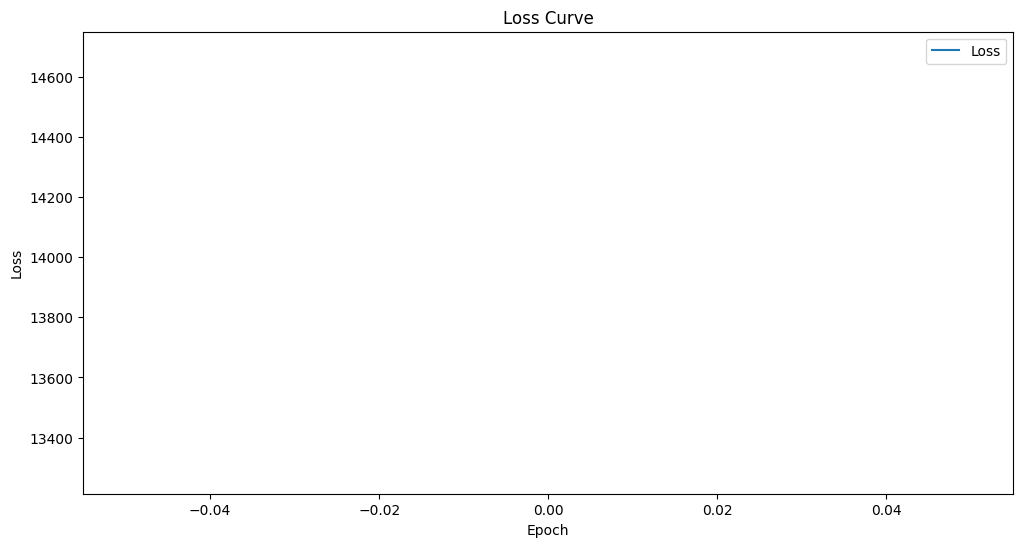

Epoch [1/1], Loss: 13981.970703125
Testing...


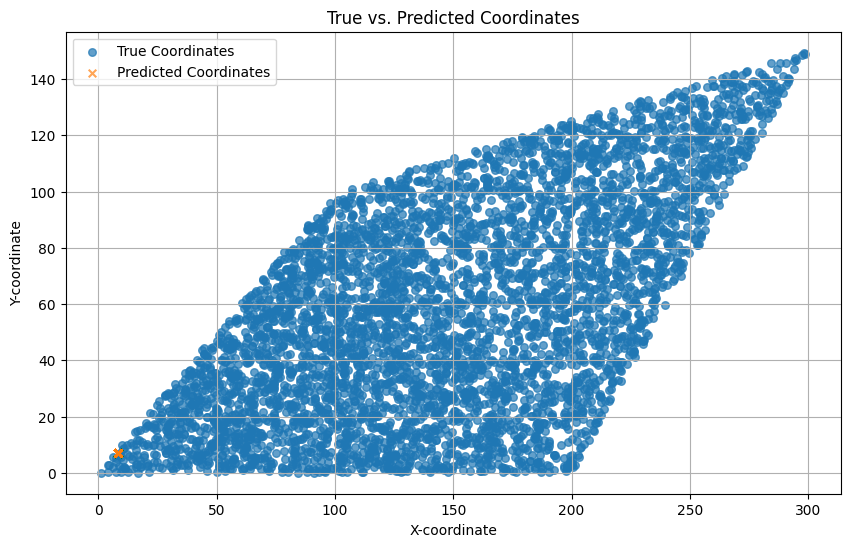

Test Loss: 13749.362182617188


In [129]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
from IPython.display import clear_output


# 数据预处理
inputs = np.concatenate((w, doppler), axis=1)  # 将 相位差和多普勒 拼接
inputs_train, inputs_test, coords_train, coords_test = train_test_split(inputs, result_array, test_size=0.1, random_state=42)

# inputs_test = inputs_t
# coords_test = result_test

# 定义一个 PyTorch 数据集
# 定义一个 PyTorch 数据集
class CoordDataset(Dataset):
    def __init__(self, inputs, coords):
        # 确保 inputs 和 coords 都是 torch.float32 类型
        self.inputs = torch.tensor(inputs, dtype=torch.float32)
        self.coords = torch.tensor(coords, dtype=torch.float32)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.coords[idx]
# 创建训练和测试数据集
train_dataset = CoordDataset(inputs_train, coords_train)
test_dataset = CoordDataset(inputs_test, coords_test)

# 创建 DataLoader
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# 定义更深的神经网络模型
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(6, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, 512)  # 新增层
        self.fc5 = nn.Linear(512, 512)  # 新增层
        self.fc6 = nn.Linear(512, 256)
        self.fc7 = nn.Linear(256, 128)
        self.fc8 = nn.Linear(128, 64)
        self.fc9 = nn.Linear(64, 32)
        self.fc10 = nn.Linear(32, 4)

        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.tanh(self.fc3(x))
        x = self.tanh(self.fc4(x))  # 新增层
        x = self.tanh(self.fc5(x))  # 新增层
        x = self.tanh(self.fc6(x))
        x = self.tanh(self.fc7(x))
        x = self.tanh(self.fc8(x))
        x = self.tanh(self.fc9(x))
        x = self.fc10(x)
        return x

# 使用GPU加速
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DNN().to(device)

# 损失函数和优化器
optimizer = optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.MSELoss()

# 训练模型
# MARK
epochs = 1
# epochs = 100

loss_values = []  # 存储损失值以供绘图

for epoch in range(epochs):
    for inputs, coords in train_loader:
        inputs, coords = inputs.to(device), coords.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, coords)
        loss.backward()
        optimizer.step()
    loss_values.append(loss.item())

    # 动态绘图
    clear_output(wait=True)
    plt.figure(figsize=(12, 6))
    plt.plot(loss_values, label='Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # 打印损失信息
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

print("Testing...")

# 测试模型
model.eval()
total_test_loss = 0
predicted_coords = []
true_coords = []
with torch.no_grad():
    for inputs, coords in test_loader:
        inputs, coords = inputs.to(device), coords.to(device)
        outputs = model(inputs)
        test_loss = criterion(outputs, coords)
        # test_loss = triangleConstraintLoss(outputs, coords)
        total_test_loss += test_loss.item()
        predicted_coords.append(outputs.cpu().numpy())
        true_coords.append(coords.cpu().numpy())

# 合并所有批次的预测结果和真实值
predicted_coords = np.concatenate(predicted_coords, axis=0)
true_coords = np.concatenate(true_coords, axis=0)
# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(true_coords[:, 0], true_coords[:, 1], label='True Coordinates', marker='o', s=30, alpha=0.7)
plt.scatter(predicted_coords[:, 0], predicted_coords[:, 1], label='Predicted Coordinates', marker='x', s=30, alpha=0.7)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.title('True vs. Predicted Coordinates')
plt.grid(True)
plt.show()
print(f'Test Loss: {total_test_loss / len(test_loader)}')

In [ ]:
# # 测试模型
# model.eval()
# total_test_loss = 0
# predicted_coords = []
# true_coords = []
# with torch.no_grad():
#     for inputs, coords in test_loader:
#         inputs, coords = inputs.to(device), coords.to(device)
#         outputs = model(inputs)
#         test_loss = triangleConstraintLoss(outputs, coords, vertex1, vertex2, vertex3)
#         total_test_loss += test_loss.item()
#         predicted_coords.append(outputs.cpu().numpy())
#         true_coords.append(coords.cpu().numpy())

# # 合并所有批次的预测结果和真实值
# predicted_coords = np.concatenate(predicted_coords, axis=0)
# true_coords = np.concatenate(true_coords, axis=0)
# # 绘制散点图
# plt.figure(figsize=(10, 6))
# plt.scatter(true_coords[:, 0], true_coords[:, 1], label='True Coordinates', marker='o', s=30, alpha=0.7)
# plt.scatter(predicted_coords[:, 0], predicted_coords[:, 1], label='Predicted Coordinates', marker='x', s=30, alpha=0.7)
# plt.xlabel('X-coordinate')
# plt.ylabel('Y-coordinate')
# plt.legend()
# plt.title('True vs. Predicted Coordinates')
# plt.grid(True)
# plt.show()
# print(f'Test Loss: {total_test_loss / len(test_loader)}')

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(true_coords[:, 0], true_coords[:, 1], label='True Coordinates', marker='o', s=30, alpha=0.7)
plt.scatter(predicted_coords[:, 0], predicted_coords[:, 1], label='Predicted Coordinates', marker='x', s=30, alpha=0.7)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.title('True vs. Predicted Coordinates')
plt.grid(True)
plt.xlim(65,115)
plt.show()
print(f'Test Loss: {total_test_loss / len(test_loader)}')

NameError: name 'true_coords' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt


# 数据预处理
inputs = np.concatenate((w, v), axis=1)  # 将 w 和 v 拼接
inputs_train, inputs_test, coords_train, coords_test = train_test_split(inputs, result_array, test_size=0.5, random_state=42)

# inputs_test = inputs_t
# coords_test = result_test

# 定义一个 PyTorch 数据集
# 定义一个 PyTorch 数据集
class CoordDataset(Dataset):
    def __init__(self, inputs, coords):
        # 确保 inputs 和 coords 都是 torch.float32 类型
        self.inputs = torch.tensor(inputs, dtype=torch.float32)
        self.coords = torch.tensor(coords, dtype=torch.float32)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.coords[idx]
# 创建训练和测试数据集
train_dataset = CoordDataset(inputs_train, coords_train)
test_dataset = CoordDataset(inputs_test, coords_test)

# 创建 DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# 定义更深的神经网络模型
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, 512)  # 新增层
        self.fc5 = nn.Linear(512, 512)  # 新增层
        self.fc6 = nn.Linear(512, 256)
        self.fc7 = nn.Linear(256, 128)
        self.fc8 = nn.Linear(128, 64)
        self.fc9 = nn.Linear(64, 32)
        self.fc10 = nn.Linear(32, 4)

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))  # 新增层
        x = self.relu(self.fc5(x))  # 新增层
        x = self.relu(self.fc6(x))
        x = self.relu(self.fc7(x))
        x = self.relu(self.fc8(x))
        x = self.relu(self.fc9(x))
        x = self.fc10(x)
        return x

# 使用GPU加速
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DNN().to(device)

#考虑约束关系
#两个接收机的圆相交点
#计算A点和B点的距离差






[
    
]
#分段训练 10000个点 收敛 学习率降低 步长变短 
#增加数据点


# 损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00005)

# 训练模型
epochs = 1500
for epoch in range(epochs):
    for inputs, coords in train_loader:
        inputs, coords = inputs.to(device), coords.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, coords)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

# 测试模型
model.eval()
total_test_loss = 0
predicted_coords = []
true_coords = []
with torch.no_grad():
    for inputs, coords in test_loader:
        inputs, coords = inputs.to(device), coords.to(device)
        outputs = model(inputs)
        test_loss = criterion(outputs, coords)
        total_test_loss += test_loss.item()
        predicted_coords.append(outputs.cpu().numpy())
        true_coords.append(coords.cpu().numpy())

# 合并所有批次的预测结果和真实值
predicted_coords = np.concatenate(predicted_coords, axis=0)
true_coords = np.concatenate(true_coords, axis=0)
# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(true_coords[:, 0], true_coords[:, 1], label='True Coordinates', marker='o', s=30, alpha=0.7)
plt.scatter(predicted_coords[:, 0], predicted_coords[:, 1], label='Predicted Coordinates', marker='x', s=30, alpha=0.7)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.title('True vs. Predicted Coordinates')
plt.grid(True)
plt.show()
print(f'Test Loss: {total_test_loss / len(test_loader)}')

Epoch [1/1500], Loss: 1072.650390625
Epoch [2/1500], Loss: 795.63720703125
Epoch [3/1500], Loss: 768.9146728515625
Epoch [4/1500], Loss: 584.3387451171875
Epoch [5/1500], Loss: 910.12255859375
Epoch [6/1500], Loss: 905.2374267578125
Epoch [7/1500], Loss: 1028.7579345703125
Epoch [8/1500], Loss: 737.1422119140625
Epoch [9/1500], Loss: 828.8736572265625
Epoch [10/1500], Loss: 492.4371643066406
Epoch [11/1500], Loss: 903.3421630859375
Epoch [12/1500], Loss: 1395.203369140625
Epoch [13/1500], Loss: 683.542724609375
Epoch [14/1500], Loss: 730.0942993164062
Epoch [15/1500], Loss: 567.9947509765625
Epoch [16/1500], Loss: 705.3511962890625
Epoch [17/1500], Loss: 501.4150085449219
Epoch [18/1500], Loss: 729.8399658203125
Epoch [19/1500], Loss: 1746.5870361328125
Epoch [20/1500], Loss: 580.0055541992188
Epoch [21/1500], Loss: 832.3045043945312
Epoch [22/1500], Loss: 537.3626708984375
Epoch [23/1500], Loss: 742.3004150390625
Epoch [24/1500], Loss: 605.3677368164062
Epoch [25/1500], Loss: 1219.261

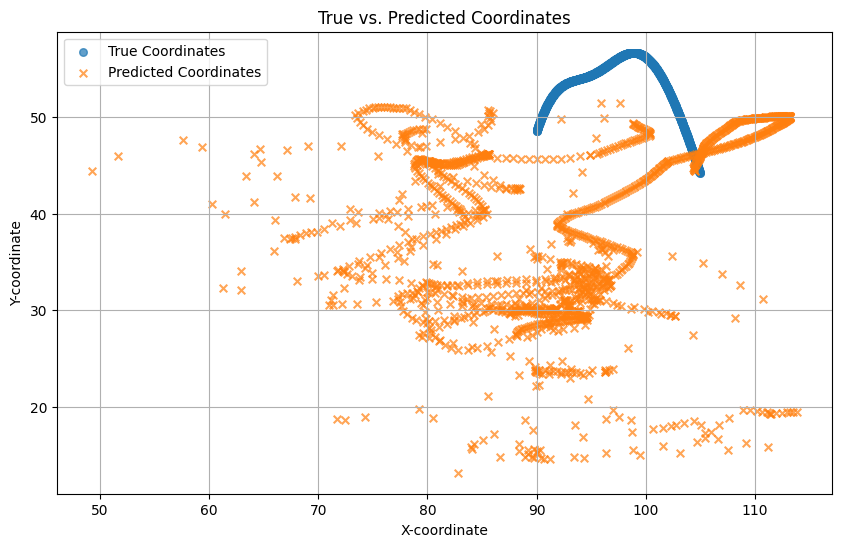

Test Loss: 244.77469597281294


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(true_coords[:1497, 0], true_coords[:1497, 1], label='True Coordinates', marker='o', s=30, alpha=0.7)
plt.scatter(predicted_coords[:1497, 0], predicted_coords[:1497, 1], label='Predicted Coordinates', marker='x', s=30, alpha=0.7)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.title('True vs. Predicted Coordinates')
plt.grid(True)
plt.show()
print(f'Test Loss: {total_test_loss / len(test_loader)}')

In [ ]:
d1 = 0
d2 = 0
for i in range(len(true_coords)-1):
    x = true_coords[i, 0]
    y = true_coords[i, 1]
    x1 = predicted_coords[i, 0]
    y1 = predicted_coords[i, 1]
    d11 = calculate_distance(x,y,vertex1[0],vertex1[1])
    d12 = calculate_distance(x1,y1,vertex1[0],vertex1[1])
    d21 = calculate_distance(x,y,vertex2[0],vertex2[1])
    d22 = calculate_distance(x1,y1,vertex2[0],vertex2[1])
    d31 = calculate_distance(x,y,vertex3[0],vertex3[1])
    d32 = calculate_distance(x1,y1,vertex3[0],vertex3[1])
    dd12 = np.abs(d11+d21-d12-d22)
    dd13 = np.abs(d11+d31-d12-d32)
    d1 = d1+dd12
    d2 = d2+dd13

In [ ]:
d2/len(true_coords)

7.759300610265623